> Team  AI'm here

# Agriculture Crop Yield Prediction


In [1]:
import pandas as pd

Read CSV dataset

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


Display first few rows to check if there is error

In [4]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Check the type of each column

In [5]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [ ]:
# list out the regions in 'Region', 'Soil_Type', 'Crop', 'Weather_Condition'

print("Regions:", df['Region'].unique())
print("Soil Types:", df['Soil_Type'].unique())
print("Crops:", df['Crop'].unique())
print("Weather Conditions:", df['Weather_Condition'].unique())


Regions: ['West' 'South' 'North' 'East']
Soil Types: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crops: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Weather Conditions: ['Cloudy' 'Rainy' 'Sunny']


In [7]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64



> It shows that there is no empty value in each column.



## Descriptive Analytics

In [8]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


In [10]:
corr = df.corr(numeric_only=True)
corr

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000


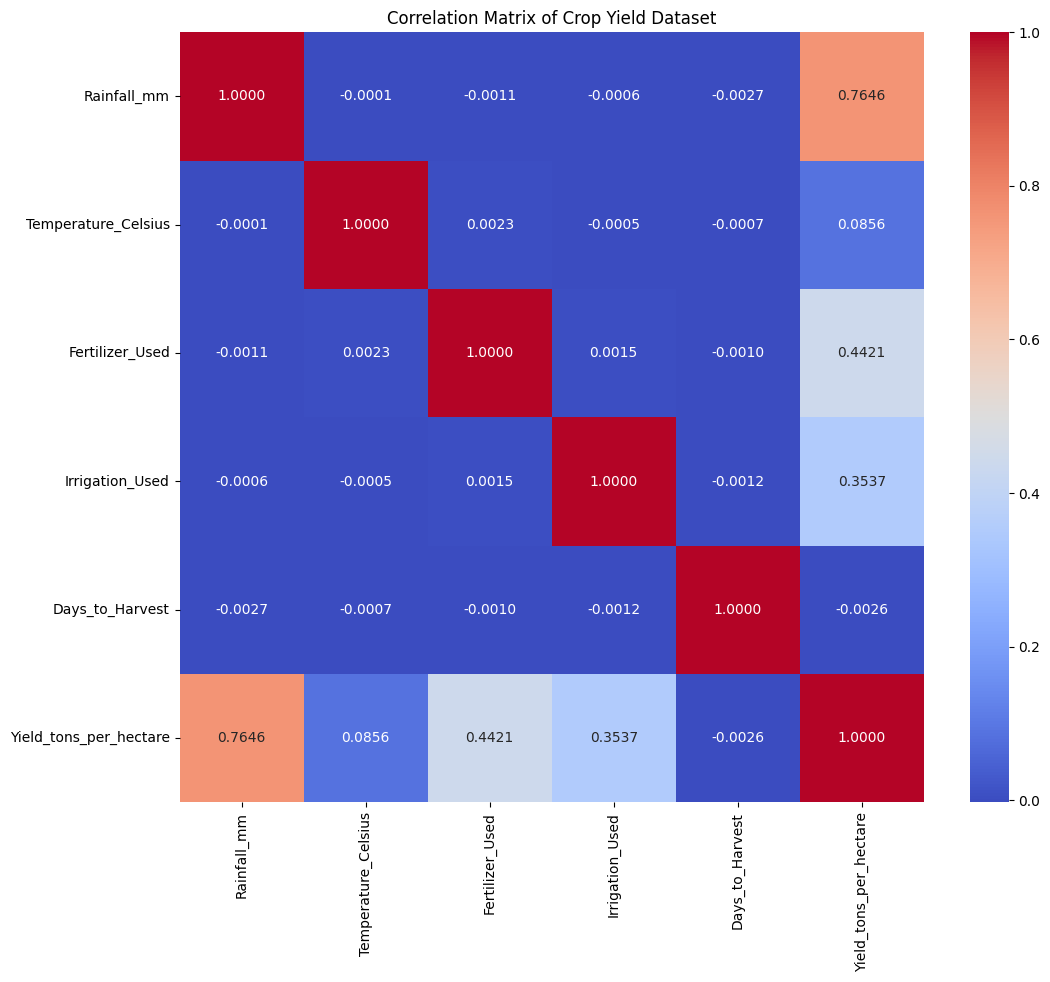

In [ ]:
# generate a heatmap for corr

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'corr' is already defined as the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Crop Yield Dataset')
plt.show()


In [ ]:
# encode 'region' and find corr
 
from sklearn.preprocessing import LabelEncoder

# Encode the 'Region' column
le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])

# Find the correlation matrix
corr = df.corr(numeric_only=True)
print(corr)

                          Region  Soil_Type      Crop  Rainfall_mm  \
Region                  1.000000  -0.001143  0.000494     0.000478   
Soil_Type              -0.001143   1.000000  0.000869    -0.000678   
Crop                    0.000494   0.000869  1.000000     0.001214   
Rainfall_mm             0.000478  -0.000678  0.001214     1.000000   
Temperature_Celsius     0.000784   0.000732  0.000286    -0.000123   
Fertilizer_Used         0.000570   0.001364  0.000871    -0.001076   
Irrigation_Used         0.000217  -0.000564  0.000657    -0.000568   
Weather_Condition      -0.001450   0.001695 -0.001783     0.001360   
Days_to_Harvest        -0.001169   0.000602  0.000329    -0.002669   
Yield_tons_per_hectare  0.000390  -0.000333  0.001283     0.764618   

                        Temperature_Celsius  Fertilizer_Used  Irrigation_Used  \
Region                             0.000784         0.000570         0.000217   
Soil_Type                          0.000732         0.001364       

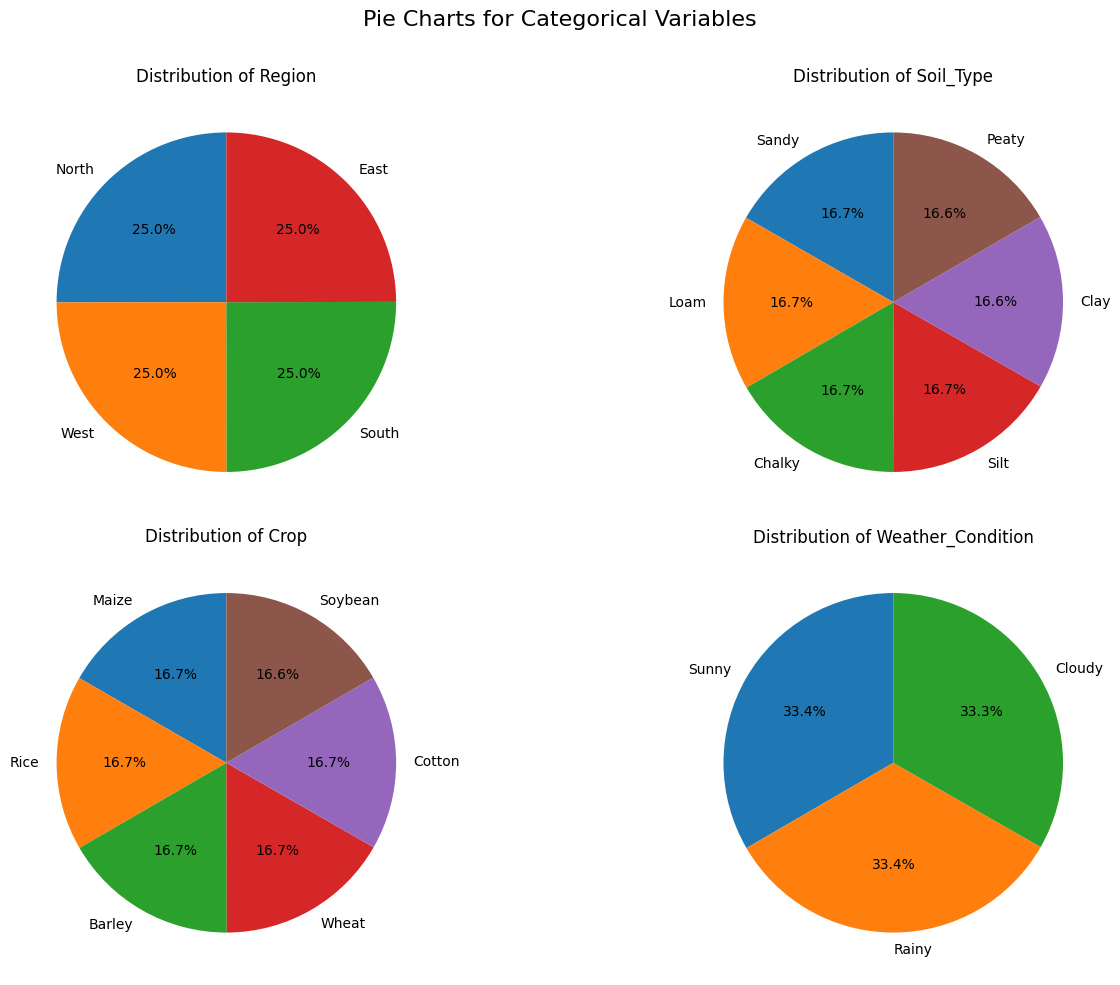

In [ ]:
# draw pie chart to show the count of object for 'Region', 'Soil Types', 'Crops', 'Weather Conditions'  each into a single chart

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data

def plot_pie_charts(df, columns):
  """
  Plots pie charts for the counts of unique values in specified columns.

  Args:
    df: pandas DataFrame.
    columns: List of column names to plot.
  """
  num_charts = len(columns)
  rows = (num_charts + 1) // 2  # Calculate number of rows for subplots
  cols = 2  # Number of columns for subplots

  fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
  fig.suptitle('Pie Charts for Categorical Variables', fontsize=16)

  for i, column in enumerate(columns):
    row_idx = i // cols
    col_idx = i % cols

    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    value_counts = df[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {column}')

  # Remove any unused subplots
  for i in range(len(columns), rows * cols):
    row_idx = i // cols
    col_idx = i % cols
    if rows > 1:
      fig.delaxes(axes[row_idx, col_idx])
    else:
      fig.delaxes(axes[col_idx])

  plt.tight_layout()
  plt.subplots_adjust(top=0.9)
  plt.show()

# Specify the columns to plot
columns_to_plot = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Call the function to plot pie charts
plot_pie_charts(df, columns_to_plot)


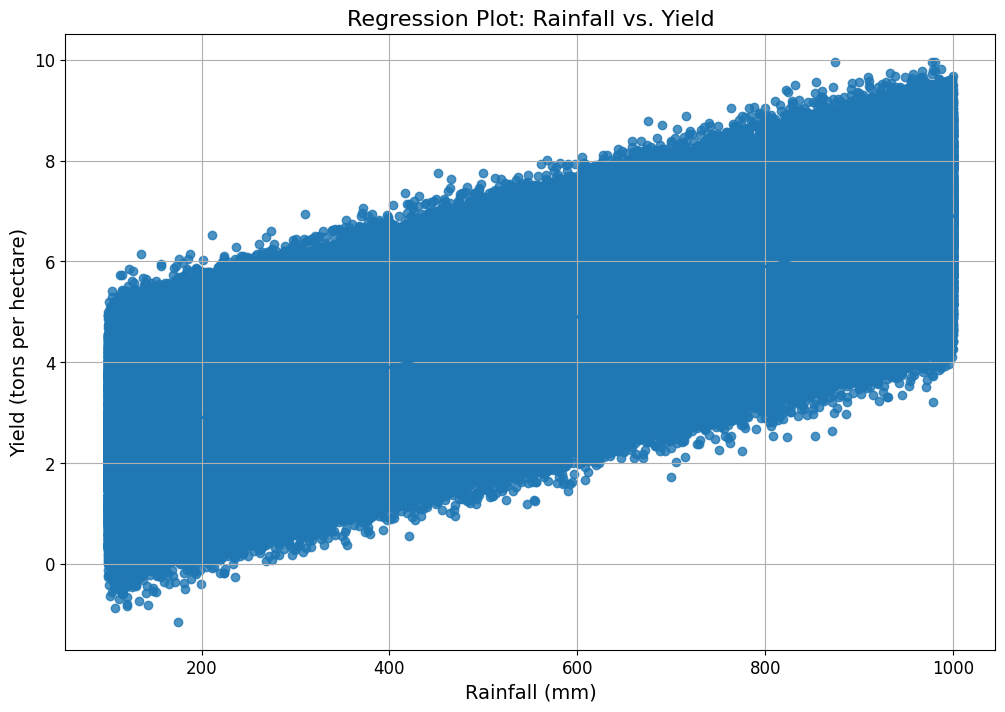

In [ ]:
# draw a regression plot of rainfall_mm vs yield_tons_per_hectare using seaborn, in hd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'rainfall_mm' and 'yield_tons_per_hectare'

plt.figure(figsize=(12, 8))  # Adjust figure size for HD appearance
sns.regplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Yield (tons per hectare)', fontsize=14)
plt.title('Regression Plot: Rainfall vs. Yield', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


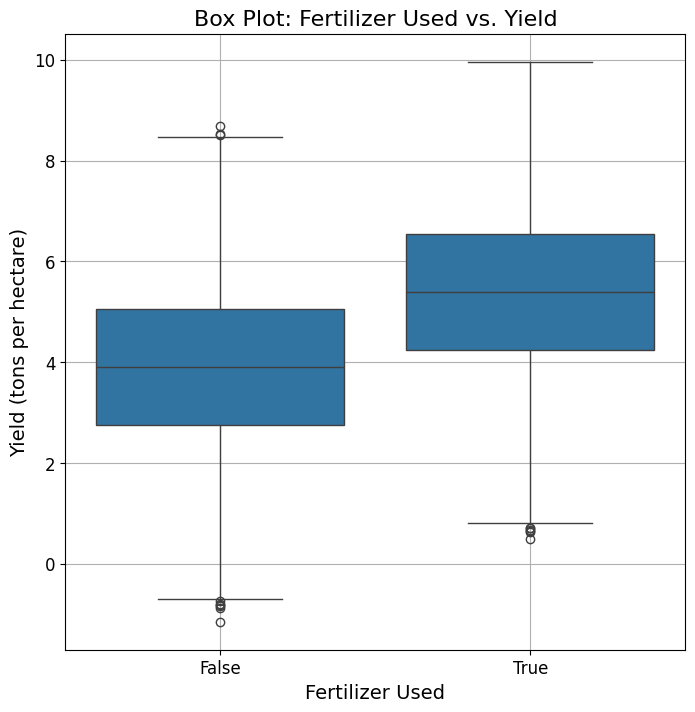

In [ ]:
# draw boxplot for 'Fertilizer_Used' and 'Yield_tons_per_hectare'
# Assuming 'df' is your DataFrame containing 'Fertilizer_Used' and 'Yield_tons_per_hectare'

plt.figure(figsize=(8, 8))  # Adjust figure size for HD appearance
sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df)
plt.xlabel('Fertilizer Used', fontsize=14)
plt.ylabel('Yield (tons per hectare)', fontsize=14)
plt.title('Box Plot: Fertilizer Used vs. Yield', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


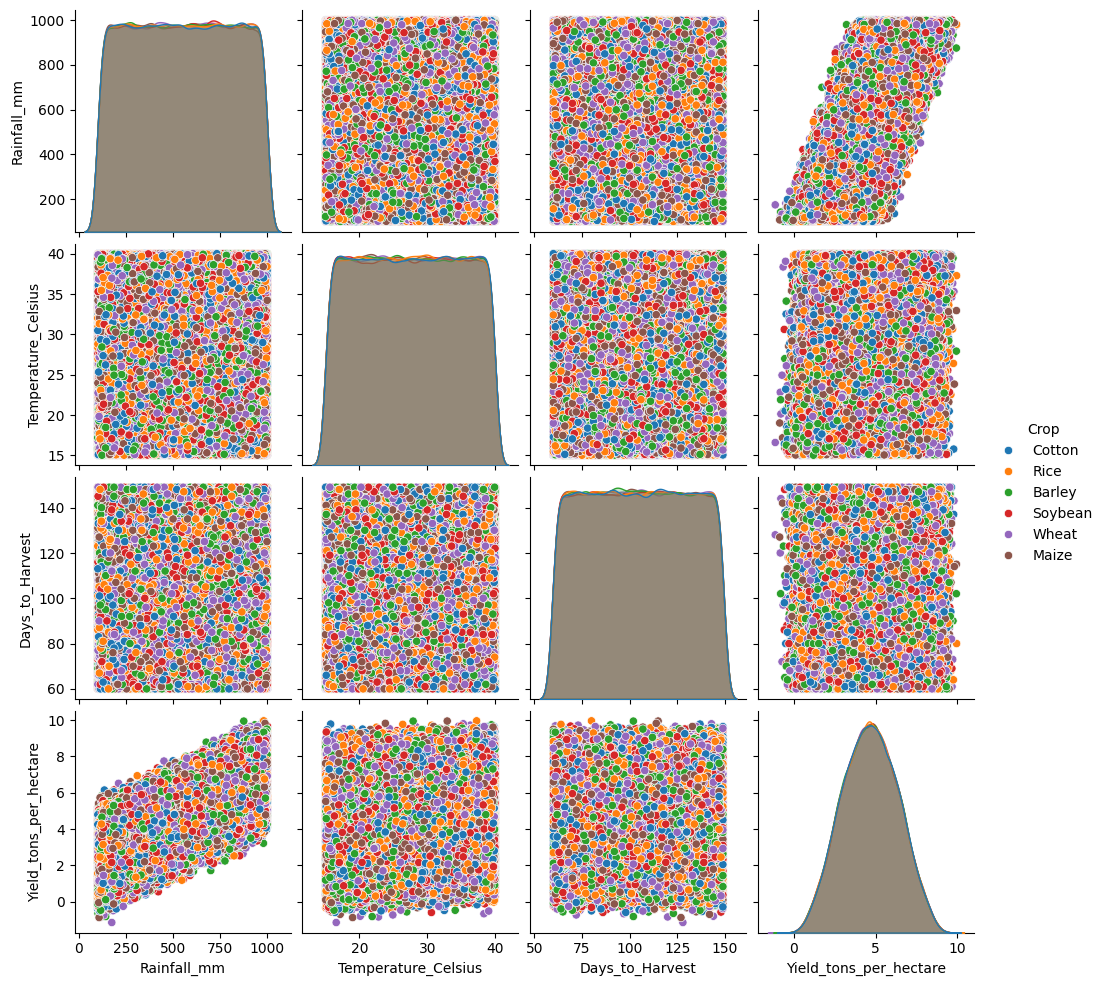

In [ ]:
# generate pairplot for 'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare' and categorise with 'Crops'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data

# Select the columns for the pairplot
columns_for_pairplot = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']

# Create the pairplot, using 'Crop' for hue
sns.pairplot(df, vars=columns_for_pairplot, hue='Crop')

# Display the plot
plt.show()


Mean Squared Error: 1.1997728661165252
R-squared: 0.5838380102207115
Coefficients: [0.0049931]
Intercept: 1.9035469989997584


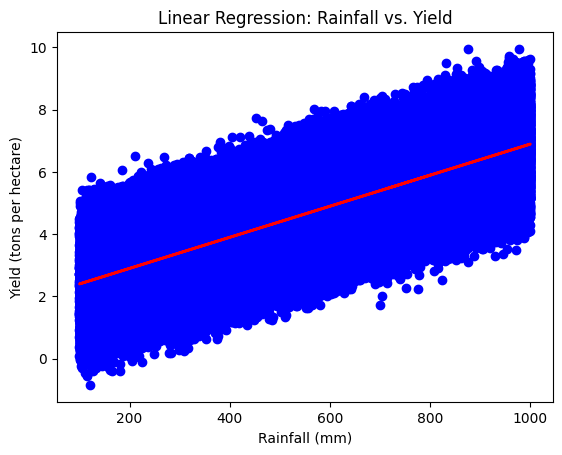

In [ ]:
# Build linear regression model using `rainfall_mm` to predict `yield_tons_per_hectare`

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already defined and contains the data

# Prepare the data
X = df[['Rainfall_mm']]  # Feature (independent variable)
y = df['Yield_tons_per_hectare']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# You can also plot the regression line against the actual data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.title('Linear Regression: Rainfall vs. Yield')
plt.show()


Mean Squared Error: 2.8631900333671148
R-squared: 0.0068529677128407185
Coefficients: [0.02026165]
Intercept: 4.091600871267773


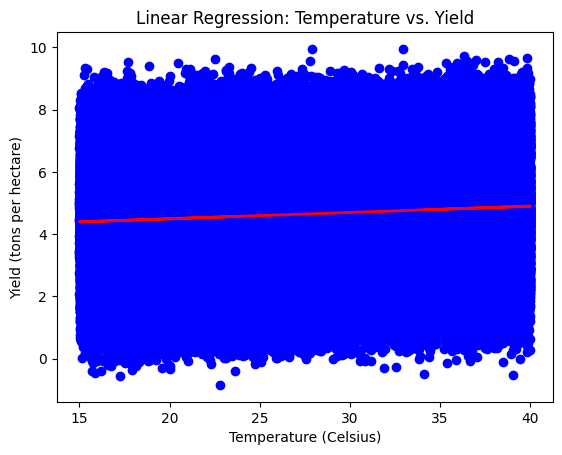

In [ ]:
# Build linear regression model using `Temperature_Celcius` to predict `yield_tons_per_hectare`

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already defined and contains the data

# Prepare the data
X = df[['Temperature_Celsius']]  # Feature (independent variable)
y = df['Yield_tons_per_hectare']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# You can also plot the regression line against the actual data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Yield (tons per hectare)')
plt.title('Linear Regression: Temperature vs. Yield')
plt.show()


Mean Squared Error: 2.882944554558815
R-squared: 7.700357209650122e-07
Coefficients: [-0.00018142]
Intercept: 4.667969783501468


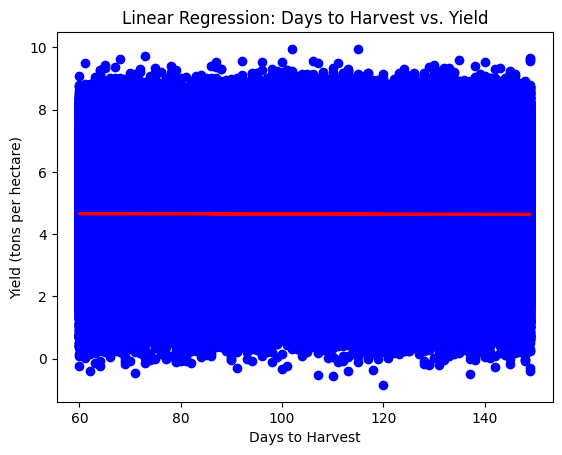

In [ ]:
# Build linear regression model using `Days_to_harvest` to predict `yield_tons_per_hectare`

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already defined and contains the data

# Prepare the data
X = df[['Days_to_Harvest']]  # Feature (independent variable)
y = df['Yield_tons_per_hectare']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# You can also plot the regression line against the actual data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons per hectare)')
plt.title('Linear Regression: Days to Harvest vs. Yield')
plt.show()


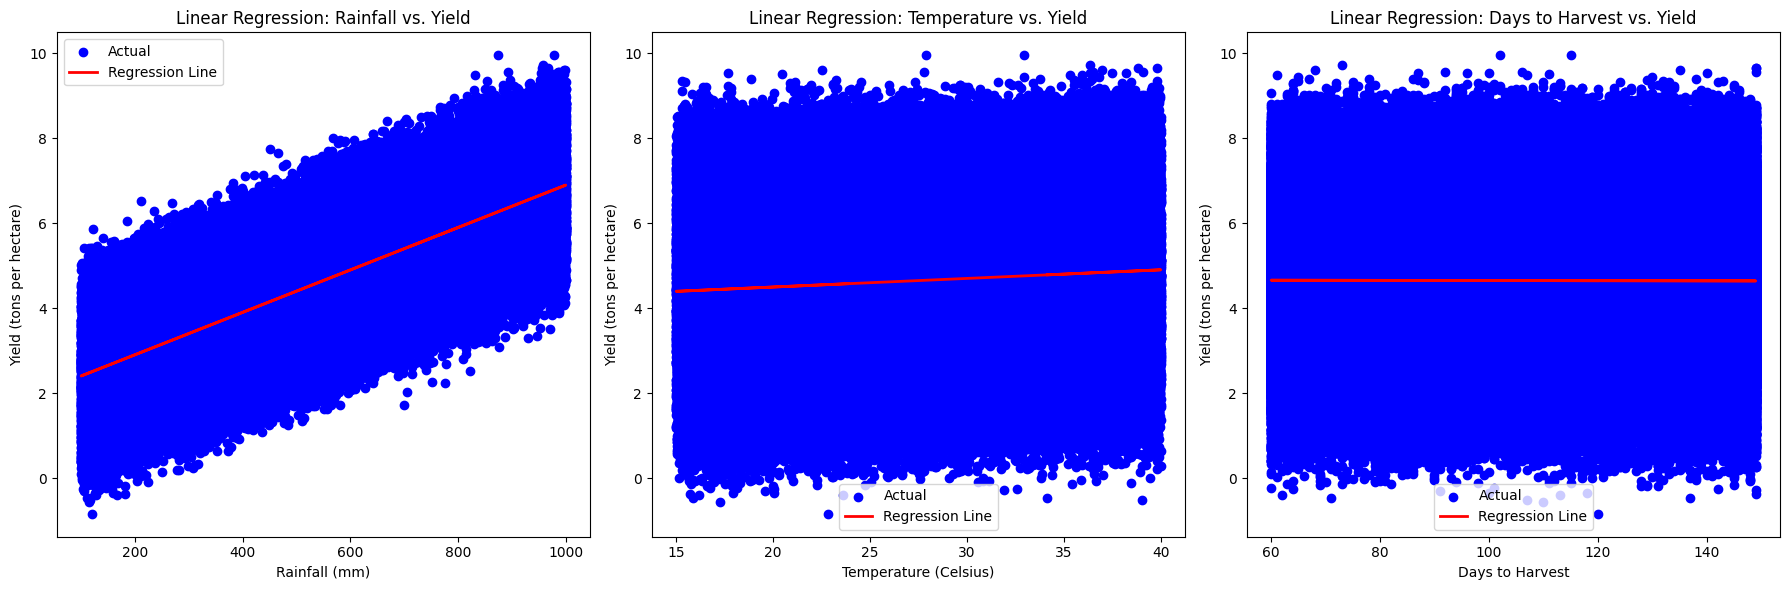

In [ ]:
# Combine the linear regression plot of `rainfall_mm`, `temperature_celcius`, and `days_to_harvest` into a single chart.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already defined and contains the data

# Prepare the data for all three features
X_rainfall = df[['Rainfall_mm']]
y_rainfall = df['Yield_tons_per_hectare']
X_temp = df[['Temperature_Celsius']]
y_temp = df['Yield_tons_per_hectare']
X_days = df[['Days_to_Harvest']]
y_days = df['Yield_tons_per_hectare']

# Split the data into training and testing sets for each feature
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X_rainfall, y_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
X_train_days, X_test_days, y_train_days, y_test_days = train_test_split(X_days, y_days, test_size=0.2, random_state=42)

# Create and train linear regression models for each feature
model_rain = LinearRegression()
model_rain.fit(X_train_rain, y_train_rain)
y_pred_rain = model_rain.predict(X_test_rain)

model_temp = LinearRegression()
model_temp.fit(X_train_temp, y_train_temp)
y_pred_temp = model_temp.predict(X_test_temp)

model_days = LinearRegression()
model_days.fit(X_train_days, y_train_days)
y_pred_days = model_days.predict(X_test_days)


# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Rainfall vs Yield
axes[0].scatter(X_test_rain, y_test_rain, color='blue', label='Actual')
axes[0].plot(X_test_rain, y_pred_rain, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Rainfall (mm)')
axes[0].set_ylabel('Yield (tons per hectare)')
axes[0].set_title('Linear Regression: Rainfall vs. Yield')
axes[0].legend()

# Plot for Temperature vs Yield
axes[1].scatter(X_test_temp, y_test_temp, color='blue', label='Actual')
axes[1].plot(X_test_temp, y_pred_temp, color='red', linewidth=2, label='Regression Line')
axes[1].set_xlabel('Temperature (Celsius)')
axes[1].set_ylabel('Yield (tons per hectare)')
axes[1].set_title('Linear Regression: Temperature vs. Yield')
axes[1].legend()

# Plot for Days to Harvest vs Yield
axes[2].scatter(X_test_days, y_test_days, color='blue', label='Actual')
axes[2].plot(X_test_days, y_pred_days, color='red', linewidth=2, label='Regression Line')
axes[2].set_xlabel('Days to Harvest')
axes[2].set_ylabel('Yield (tons per hectare)')
axes[2].set_title('Linear Regression: Days to Harvest vs. Yield')
axes[2].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


## Prepare data for Machine Learning

In [20]:
inputs = ["Rainfall_mm"]
target = "Yield_tons_per_hectare"

# Prepare training data
X = df[inputs]
y = df[target]

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# calculate the Mean Squared Error, R-squared, Coefficients

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1.1997728661165252
R-squared: 0.5838380102207115
Coefficients: [0.0049931]
Intercept: 1.9035469989997584


In [ ]:
# predict the Yield tons per hectare with Rainfall_mm of 300mm, remove warnings.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df, X, y, model are already defined from the previous code

# Predict yield for Rainfall_mm of 300mm
new_rainfall = pd.DataFrame({'Rainfall_mm': [300]})
predicted_yield = model.predict(new_rainfall)

print("Predicted Yield (tons per hectare) for Rainfall of 300mm:", predicted_yield[0], "tons/hectare")


Predicted Yield (tons per hectare) for Rainfall of 300mm: 3.4014778295580594 tons/hectare


In [ ]:
# encode 'Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical features
for column in ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']:
  df[column] = le.fit_transform(df[column])

# Display the encoded DataFrame
df.head()


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [ ]:
# Build our final model using `Region`,`Soil_Type`,`Crop`,`Rainfall_mm`, 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest' and `Yield_tons_per_hectare`

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.preprocessing import LabelEncoder
# Suppress warnings
warnings.filterwarnings("ignore")


# Assuming df is already defined and contains the data

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical features
for column in ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']:
  df[column] = le.fit_transform(df[column])

# Prepare the data for the final model
inputs = ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
          'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']
target = 'Yield_tons_per_hectare'

X = df[inputs]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Mean Squared Error: 0.25077179363715546
R-squared: 0.913015461869577
Coefficients: [-3.20923228e-04 -2.78288486e-04 -2.03668552e-04  4.99665319e-03
  1.99355529e-02  1.49940284e+00  1.19921297e+00 -1.25224449e-04
  2.02680777e-05]
Intercept: 0.003659872357163252


In [ ]:
# Predict Yield_tons_per_hectare for a specific combination of Rainfall_mm, Temperature_Celsius, and Fertilizer_Used

import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df, model, and inputs are already defined from the previous code

# Create a new DataFrame with the specific input values
new_data = pd.DataFrame({
    'Region': [0],  # Replace with the actual encoded region
    'Soil_Type': [0],  # Replace with the actual encoded soil type
    'Crop': [0],  # Replace with the actual encoded crop
    'Rainfall_mm': [800],  # Replace with the desired rainfall
    'Temperature_Celsius': [30],  # Replace with the desired temperature
    'Fertilizer_Used': [0],  # Replace with the desired fertilizer type (encoded)
    'Irrigation_Used': [0],  # Replace with the desired irrigation type (encoded)
    'Weather_Condition': [0],  # Replace with the desired weather condition (encoded)
    'Days_to_Harvest': [100]  # Replace with the desired days to harvest
})

# Make a prediction using the trained model
predicted_yield = model.predict(new_data)

print("Predicted Yield (tons per hectare):", predicted_yield[0], "tons/hectare")


Predicted Yield (tons per hectare): 4.601075816075059 tons/hectare


# Integration with weather api

In [30]:
!pip install requests

import forecast weather data from OpenWeatherMap API

In [31]:
import requests
from datetime import datetime, timedelta

def fetch_forecast_data(api_key, location):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}&units=metric"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()  # Returns forecast data as a JSON object
    else:
        print(f"Error: {response.status_code}")
        return None

def extract_tomorrow_forecast(forecast_data):
    tomorrow_data = []
    current_time = datetime.now()
    tomorrow_time = current_time + timedelta(days=1)

    for entry in forecast_data['list']:
        forecast_time = datetime.fromtimestamp(entry['dt'])
        if forecast_time.date() == tomorrow_time.date():
            temperature = entry['main']['temp']  # Temperature in Celsius
            humidity = entry['main']['humidity']  # Humidity in percentage
            precipitation = entry.get('rain', {}).get('1h', 0)  # Rainfall in mm
            weather_description = entry['weather'][0]['description']  # Weather description

            tomorrow_data.append({
                'time': forecast_time,
                'temperature': temperature,
                'humidity': humidity,
                'precipitation': precipitation,
                'description': weather_description
            })

    return tomorrow_data

# Example usage
api_key = '4b99694e7478e60c63af7e4e3ee4a55c'
location = 'Kuala Lumpur'
forecast_data = fetch_forecast_data(api_key, location)


In [32]:
forecast_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1728950400,
   'main': {'temp': 26.2,
    'feels_like': 26.2,
    'temp_min': 25.91,
    'temp_max': 26.2,
    'pressure': 1011,
    'sea_level': 1011,
    'grnd_level': 1004,
    'humidity': 93,
    'temp_kf': 0.29},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 20},
   'wind': {'speed': 0.48, 'deg': 31, 'gust': 0.61},
   'visibility': 10000,
   'pop': 0.65,
   'rain': {'3h': 0.94},
   'sys': {'pod': 'd'},
   'dt_txt': '2024-10-15 00:00:00'},
  {'dt': 1728961200,
   'main': {'temp': 26.9,
    'feels_like': 30.26,
    'temp_min': 26.9,
    'temp_max': 28.3,
    'pressure': 1011,
    'sea_level': 1011,
    'grnd_level': 1005,
    'humidity': 88,
    'temp_kf': -1.4},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 44},
   'wind': {'speed': 0.73, 'deg': 195, 'gust': 1.03},
   

In [33]:
if forecast_data:
    tomorrow_forecast = extract_tomorrow_forecast(forecast_data)
    for data in tomorrow_forecast:
        print(f"Time: {data['time']}, Temperature: {data['temperature']}°C, Humidity: {data['humidity']}%, "
              f"Precipitation: {data['precipitation']} mm, Description: {data['description']}")

Time: 2024-10-16 02:00:00, Temperature: 23.59°C, Humidity: 94%, Precipitation: 0 mm, Description: overcast clouds
Time: 2024-10-16 05:00:00, Temperature: 23.51°C, Humidity: 94%, Precipitation: 0 mm, Description: light rain
Time: 2024-10-16 08:00:00, Temperature: 23.96°C, Humidity: 93%, Precipitation: 0 mm, Description: light rain
Time: 2024-10-16 11:00:00, Temperature: 26.07°C, Humidity: 85%, Precipitation: 0 mm, Description: light rain
Time: 2024-10-16 14:00:00, Temperature: 24.93°C, Humidity: 91%, Precipitation: 0 mm, Description: moderate rain
Time: 2024-10-16 17:00:00, Temperature: 23.94°C, Humidity: 94%, Precipitation: 0 mm, Description: light rain
Time: 2024-10-16 20:00:00, Temperature: 23.27°C, Humidity: 93%, Precipitation: 0 mm, Description: light rain
Time: 2024-10-16 23:00:00, Temperature: 23.24°C, Humidity: 94%, Precipitation: 0 mm, Description: overcast clouds


In [87]:
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data (replace inputs and target with your actual column names)
inputs = ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 
          'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']
target = 'Yield_tons_per_hectare'

X = df[inputs]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Create and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Function to fetch temperature from OpenWeatherMap API
def fetch_temperature(api_key, location):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        temperature = data['main']['temp']  # Temperature in Celsius
        return temperature
    else:
        print(f"Error: {response.status_code}")
        return None

In [89]:
# Function to preprocess weather data and prepare input for the model
def preprocess_weather_data(temperature):
    region = 0  # Example Region - West
    soil_type = 0  # Example Soil_Type - Sandy
    crop = 0  # Example Crop - Cotton
    rainfall_mm = 400  # Example rainfall - 400mm
    fertilizer_used = 1  # Example - Yes
    irrigation_used = 1  # Example - Yes
    weather_condition = 0  # Example Weather_Condition - Cloudy
    days_to_harvest = 30  # Example: 30 days

    # Create a DataFrame for the input features
    input_data = {
        'Region': [region],
        'Soil_Type': [soil_type],
        'Crop': [crop],
        'Rainfall_mm': [rainfall_mm],
        'Temperature_Celsius': [temperature],
        'Fertilizer_Used': [fertilizer_used],
        'Irrigation_Used': [irrigation_used],
        'Weather_Condition': [weather_condition],
        'Days_to_Harvest': [days_to_harvest]
    }
    
    return pd.DataFrame(input_data)

In [90]:
# Function to make predictions using the model
def make_prediction(model, input_data, scaler):
    scaled_data = scaler.transform(input_data)
    predicted_yield = model.predict(scaled_data)
    return predicted_yield

api_key = '4b99694e7478e60c63af7e4e3ee4a55c'  
location = 'Kuala Lumpur'

# Fetch the temperature
temperature = fetch_temperature(api_key, location)

if temperature is not None:
    # Preprocess the data with the fetched temperature
    processed_data = preprocess_weather_data(temperature)
    
    # Make prediction
    predicted_yield = make_prediction(model, processed_data, scaler)
    
    print(f"Predicted Yield: {predicted_yield[0]:.2f} tons per hectare")
else:
    print("Failed to fetch temperature data.")

Predicted Yield: 5.23 tons per hectare


In [91]:
# Function to fetch 5-day weather forecast
# Adding code for fetching weather data using OpenWeatherMap API
import requests
import json

# Function to fetch 5-day weather forecast
def fetch_weather_forecast(api_key, location='London', units='metric'):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&units={units}&appid={api_key}"
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad response status codes
        weather_data = response.json()
        
        # Extracting relevant information for the next 5 days
        forecast = []
        for entry in weather_data['list']:
            day_data = {
                'datetime': entry['dt_txt'],
                'temperature': entry['main']['temp'],
                'humidity': entry['main']['humidity'],
                'weather': entry['weather'][0]['description']
            }
            forecast.append(day_data)
        
        return forecast
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

api_key = '4b99694e7478e60c63af7e4e3ee4a55c'
forecast_data = fetch_weather_forecast(api_key, location='Kuala Lumpur')

# Displaying the fetched forecast data
forecast_data[:5]  # Showing first 5 entries

[{'datetime': '2024-10-15 03:00:00',
  'temperature': 27.35,
  'humidity': 80,
  'weather': 'light rain'},
 {'datetime': '2024-10-15 06:00:00',
  'temperature': 28.47,
  'humidity': 75,
  'weather': 'light rain'},
 {'datetime': '2024-10-15 09:00:00',
  'temperature': 27.54,
  'humidity': 81,
  'weather': 'light rain'},
 {'datetime': '2024-10-15 12:00:00',
  'temperature': 25.38,
  'humidity': 89,
  'weather': 'light rain'},
 {'datetime': '2024-10-15 15:00:00',
  'temperature': 25.11,
  'humidity': 89,
  'weather': 'light rain'}]

In [92]:
# Function to preprocess the weather data into daily averages
def preprocess_weather_data(forecast_data):
    """
    Preprocess 5-day weather forecast data to extract daily averages.
    
    Args:
    - forecast_data: List of weather data for each time interval (every 3 hours).
    
    Returns:
    - daily_weather: DataFrame containing daily aggregated weather features.
    """
    # Convert the forecast data into a DataFrame for easier manipulation
    df_weather = pd.DataFrame(forecast_data)
    
    # Convert 'datetime' to pandas datetime type
    df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
    
    # Extract date (without time) to group by day
    df_weather['date'] = df_weather['datetime'].dt.date
    
    # Group by day and calculate daily average temperature and humidity
    daily_weather = df_weather.groupby('date').agg({
        'temperature': 'mean',  # Average temperature
        'humidity': 'mean',     # Average humidity
        'weather': lambda x: x.mode()[0]  # Most frequent weather condition
    }).reset_index()
    
    return daily_weather

# Preprocess the forecast data
daily_weather = preprocess_weather_data(forecast_data)

# Display the preprocessed weather data for the next 5 days
daily_weather


,date,temperature,humidity,weather
0,2024-10-15,26.124286,85.142857,light rain
1,2024-10-16,24.250000,91.875000,light rain
2,2024-10-17,26.045000,82.000000,light rain
3,2024-10-18,26.978750,80.375000,light rain
4,2024-10-19,25.941250,84.500000,light rain
5,2024-10-20,24.560000,91.000000,overcast clouds


In [97]:
temperatures = daily_weather['temperature'].tolist()[:5]
print(temperatures)

[26.124285714285715, 24.25, 26.045, 26.97875, 25.94125]


In [98]:
num_days = len(temperatures)

# Prepare the input data for the model
input_data = pd.DataFrame({
    'Region': [0] * num_days,  # Replace with the actual encoded region
    'Soil_Type': [0] * num_days,  # Replace with the actual encoded soil type
    'Crop': [0] * num_days,  # Replace with the actual encoded crop
    'Rainfall_mm': [400] * num_days,  # Replace with the desired rainfall
    'Temperature_Celsius': temperatures,  # Use the defined temperatures
    'Fertilizer_Used': [0] * num_days,  # Replace with the desired fertilizer type (encoded)
    'Irrigation_Used': [0] * num_days,  # Replace with the desired irrigation type (encoded)
    'Weather_Condition': [0] * num_days,  # Replace with the desired weather condition (encoded)
    'Days_to_Harvest': [100] * num_days  # Replace with the desired days to harvest
})

# Scale the input data
scaled_data = scaler.transform(input_data)

# Predict the yield for each day
predicted_yields = model.predict(scaled_data)

# Ensure all predictions are non-negative
predicted_yields = np.maximum(predicted_yields, 0)

# Display the predicted yield for each day
for i, yield_prediction in enumerate(predicted_yields):
    print(f"Day {i+1} - Temperature: {temperatures[i]:.2f}°C, Predicted Yield: {yield_prediction:.5f} tons per hectare")


Day 1 - Temperature: 26.12°C, Predicted Yield: 2.52515 tons per hectare
Day 2 - Temperature: 24.25°C, Predicted Yield: 2.48779 tons per hectare
Day 3 - Temperature: 26.05°C, Predicted Yield: 2.52357 tons per hectare
Day 4 - Temperature: 26.98°C, Predicted Yield: 2.54218 tons per hectare
Day 5 - Temperature: 25.94°C, Predicted Yield: 2.52150 tons per hectare


In [105]:
# Add the predicted yields to the daily_weather DataFrame
daily_weather = daily_weather.iloc[:5]  # Ensure the length matches
daily_weather['predicted_yield'] = predicted_yields

# Find the day with the highest predicted yield
best_day = daily_weather.loc[daily_weather['predicted_yield'].idxmax()]

# Assuming day 1 is today
today = daily_weather.iloc[0]

# Print today's predicted yield and best day's predicted yield for debugging
print(f"Today's predicted yield: {today['predicted_yield']:.5f}")

# Check if today is the best day
if today['predicted_yield'] >= best_day['predicted_yield']:
    print("Today is the best day to crop to get the highest yield.")
else:
    print(f"Today is not the day to crop to get highest yield!\nThe best day to crop to get the highest yield is on {best_day['date']} with a predicted yield of {best_day['predicted_yield']:.5f} tons per hectare.")

print(f"Best day's predicted yield: {best_day['predicted_yield']:.5f} on {best_day['date']}")


Today's predicted yield: 2.52515
Today is not the day to crop to get highest yield!
The best day to crop to get the highest yield is on 2024-10-18 with a predicted yield of 2.54218 tons per hectare.
Best day's predicted yield: 2.54218 on 2024-10-18
